In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import sympy 
from sympy import banded, ones, Matrix, symbols, sqrt
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import wofz 

In [4]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [5]:
Nv = 4

In [39]:
zeta = symbols('\zeta') 
k = symbols('k', integer = True)

In [40]:
vec = sympy.zeros(Nv)
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ (sympy.sqrt(2))

In [41]:
vec[0, :]

Matrix([[sqrt(2)/2, 1, sqrt(6)/2, sqrt(2)]])

In [42]:
A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1])})

In [43]:
A

Matrix([
[        0, sqrt(2)/2,         0,         0],
[sqrt(2)/2,         0,         1,         0],
[        0,         1,         0, sqrt(6)/2],
[        0,         0, sqrt(6)/2,         0]])

In [44]:
I = np.eye(Nv, dtype=int)

In [45]:
M = sympy.Matrix(I*zeta - k/np.abs(k) * A)

In [46]:
sympy.simplify(M.inv())

Matrix([
[            (4*\zeta**3 - 10*\zeta)/(4*\zeta**4 - 12*\zeta**2 + 3), sqrt(2)*k*(2*\zeta**2 - 3)/((4*\zeta**4 - 12*\zeta**2 + 3)*Abs(k)),                     2*sqrt(2)*\zeta/(4*\zeta**4 - 12*\zeta**2 + 3),                2*sqrt(3)*k/((4*\zeta**4 - 12*\zeta**2 + 3)*Abs(k))],
[sqrt(2)*k*(2*\zeta**2 - 3)/((4*\zeta**4 - 12*\zeta**2 + 3)*Abs(k)),              (4*\zeta**3 - 6*\zeta)/(4*\zeta**4 - 12*\zeta**2 + 3),               4*\zeta**2*k/((4*\zeta**4 - 12*\zeta**2 + 3)*Abs(k)),                     2*sqrt(6)*\zeta/(4*\zeta**4 - 12*\zeta**2 + 3)],
[                    2*sqrt(2)*\zeta/(4*\zeta**4 - 12*\zeta**2 + 3),               4*\zeta**2*k/((4*\zeta**4 - 12*\zeta**2 + 3)*Abs(k)),              (4*\zeta**3 - 2*\zeta)/(4*\zeta**4 - 12*\zeta**2 + 3), sqrt(6)*k*(2*\zeta**2 - 1)/((4*\zeta**4 - 12*\zeta**2 + 3)*Abs(k))],
[               2*sqrt(3)*k/((4*\zeta**4 - 12*\zeta**2 + 3)*Abs(k)),                     2*sqrt(6)*\zeta/(4*\zeta**4 - 12*\zeta**2 + 3), sqrt(6)*k*(2*\zeta**2 - 1)/((4*\

In [47]:
sympy.simplify(sympy.simplify(M.inv()[0, 1]/sympy.sqrt(2)) * k / np.abs(k))

(2*\zeta**2 - 3)/(4*\zeta**4 - 12*\zeta**2 + 3)

# Kinetic response function 

In [19]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(xi):
    return -(1 + xi*Z_fun(xi))

def RHP3(xi):
    xi = xi*np.sqrt(2)
    return (-1j*xi + 1.596)/(-1j*(xi**3) + 1.596*(xi**2) + 3*1j*xi -1.596)

def RHP4(xi):
    xi = xi*np.sqrt(2)
    return (xi**2 + 3.519*1j*xi -5.615)/(xi**4 + 3.519*1j*(xi**3) -8.615*(xi**2) -10.556*1j*xi + 5.615)

def R3(xi):
    return 1/(2*(xi**2) -3)

def R4(xi):
    return (2*(xi**2) - 3)/(4*(xi**4) - 12*(xi**2) + 3)

def R5(xi):
    return (2*(xi**2) - 7)/(4*(xi**4) - 20*(xi**2) + 15)

def R6(xi):
    return (8*(xi**4) - 48*(xi**2) + 30)/(16*(xi**6) - 120*(xi**4) + 180*(xi**2) - 30)

def R7(xi):
    return (1.5 * (xi**4) - 13.5*(xi**2) + 21.375)/ (3*(xi**6) -31.5*(xi**4) + 78.75*(xi**2)  -39.375)

def R20(xi):
    return sympy.lambdify(zeta, sympy.simplify(M.inv()[0, 1]/sympy.sqrt(2)))(xi)

In [20]:
xi = 10**np.linspace(-2, 2, int(1e3))

In [21]:
R_3 = R3(xi)
R_HP3 = RHP3(xi)
R_HP4 = RHP4(xi)
R_4 = R4(xi)
R_5 = R5(xi)
R_20 = R20(xi)
R_true = R(xi)

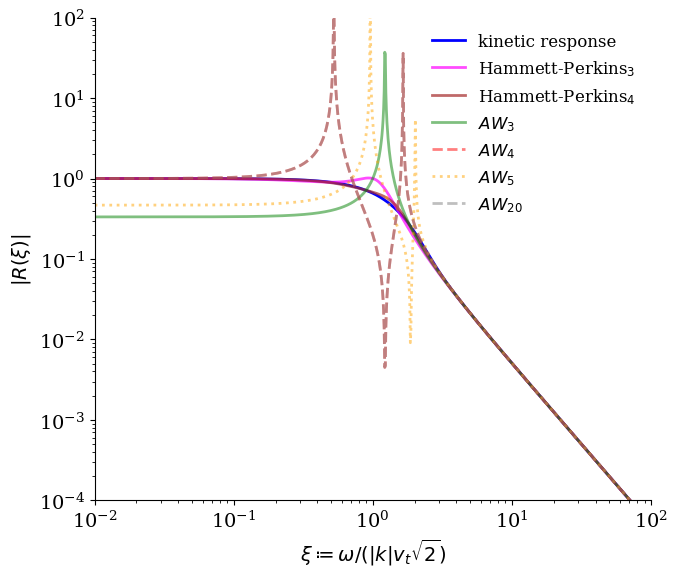

In [22]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.abs(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.abs(R_HP3), label=r"Hammett-Perkins$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_HP4), label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_3), label=r"$AW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_4), label=r"$AW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_5), label=r"$AW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_20), label=r"$AW_{20}$", c="grey", ls="--", linewidth=2, alpha=0.5)
ax.set_ylim(10**-4, 10**2)
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi)|$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_SPS_AW.png", dpi=600)

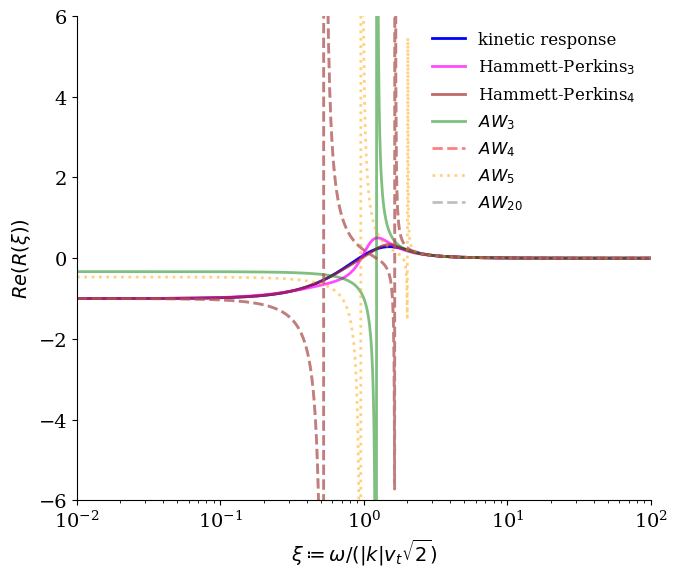

In [23]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.real(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.real(R_HP3), label=r"Hammett-Perkins$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_HP4), label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_3), label=r"$AW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_4), label=r"$AW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_5), label=r"$AW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_20), label=r"$AW_{20}$", c="grey", ls="--", linewidth=2, alpha=0.5)

ax.set_ylim(-6, 6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$Re(R(\xi))$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_SPS_real_AW.png", dpi=600)

# Landau Damping

In [24]:
# Despersion relation
def disp_k(xi, k=1):
    return k**2 - R(xi=xi/np.sqrt(2))

# Despersion relation
def disp_k_hp3(xi, k=1):
    return k**2 - RHP3(xi=xi/np.sqrt(2))

# Despersion relation
def disp_k_hp4(xi, k=1):
    return k**2 - RHP4(xi=xi/np.sqrt(2))

# Despersion relation
def disp_k_20(xi, k=1):
    return k**2 - R20(xi=xi/np.sqrt(2))

In [25]:
k_vector = np.linspace(0.2, 1, 120)
damping_vector = np.zeros(len(k_vector), dtype="complex128")
damping_vector_hp3 = np.zeros(len(k_vector), dtype="complex128")
damping_vector_hp4 = np.zeros(len(k_vector), dtype="complex128")
damping_vector_20 = np.zeros(len(k_vector), dtype="complex128")

In [ ]:
for ii, kk in enumerate(k_vector):
    damping_vector[ii] = scipy.optimize.newton(lambda xi: disp_k(xi=xi, k=kk), 1.4 - 0.81j*kk, maxiter=1000)
    # plt.scatter(kk, np.abs(disp_k(xi=damping_vector[ii], k=kk)))
    try:
        damping_vector_20[ii] = scipy.optimize.newton(lambda xi: disp_k_20(xi=xi, k=kk), 2.1 - 0.2j*kk, maxiter=1000)
        damping_vector_hp3[ii] = scipy.optimize.newton(lambda xi: disp_k_hp3(xi=xi, k=kk), 2.1 - 0.2j*kk, maxiter=1000)
        damping_vector_hp4[ii] = scipy.optimize.newton(lambda xi: disp_k_hp4(xi=xi, k=kk), 2.1 - 0.5j*kk, maxiter=1000)
        plt.scatter(kk, np.abs(disp_k_hp3(xi=damping_vector_hp3[ii], k=kk)))
        plt.scatter(kk, np.abs(disp_k_hp4(xi=damping_vector_hp4[ii], k=kk)))
    except:
        print("An exception occurred")

An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred


In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(k_vector, damping_vector.imag*k_vector, label=r"kinetic response", c="blue", linewidth=2)
ax.plot(k_vector, damping_vector_hp4.imag*k_vector, label=r"Hammett-Perkins$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(k_vector, damping_vector_hp3.imag*k_vector, label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(k_vector, damping_vector_20.imag*k_vector, label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)

ax.set_ylabel(r"growth rate")
ax.set_xlabel(r"wave number $k$")
ax.set_xlim(k_vector[0], k_vector[-1])
plt.grid()
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

#plt.savefig("../figs/magnitude.png", dpi=600)